In [1]:
import seaborn as visual
import matplotlib.pyplot as plt # for plotting the data.
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

from sklearn.preprocessing import StandardScaler
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [2]:
import pandas as pd
data = pd.read_csv("data.csv")
whole_data=data.sample(frac=1).reset_index(drop=True)
whole_data

# id: ID number
# diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)
# radius_mean: mean of distances from center to points on the perimeter
# texture_mean: standard deviation of gray-scale values
# perimeter_mean: mean size of the core tumor
# area_mean: area of the tumor
# smoothness_mean: mean of local variation in radius lengths
# compactness_mean: mean of perimeter^2 / area - 1.0
# concavity_mean: mean of severity of concave portions of the contour
# concave_points_mean: mean for number of concave portions of the contour
# symmetry_mean
# fractal_dimension_mean: mean for "coastline approximation" - 1
# radius_se: standard error for the mean of distances from center to points on the perimeter
# texture_se: standard error for standard deviation of gray-scale values
# perimeter_se
# area_se
# smoothness_se: standard error for local variation in radius lengths
# compactness_se: standard error for perimeter^2 / area - 1.0
# concavity_se: standard error for severity of concave portions of the contour
# concave_points_se: standard error for number of concave portions of the contour
# symmetry_se
# fractal_dimension_se: standard error for "coastline approximation" - 1
# radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter
# texture_worst: "worst" or largest mean value for standard deviation of gray-scale values
# perimeter_worst
# area_worst
# smoothness_worst: "worst" or largest mean value for local variation in radius lengths
# compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0
# concavity_worst: "worst" or largest mean value for severity of concave portions of the contour
# concave_points_worst: "worst" or largest mean value for number of concave portions of the contour
# symmetry_worst
# fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,9110720,B,11.99,24.89,77.61,441.3,0.10300,0.09218,0.054410,0.04274,...,30.36,84.48,513.9,0.13110,0.18220,0.16090,0.12020,0.2599,0.08251,NaN
1,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742,NaN
2,868826,M,14.95,17.57,96.85,678.1,0.11670,0.13050,0.153900,0.08624,...,21.43,121.40,971.4,0.14110,0.21640,0.33550,0.16670,0.3414,0.07147,NaN
3,8813129,B,13.27,17.02,84.55,546.4,0.08445,0.04994,0.035540,0.02456,...,23.60,98.84,708.8,0.12760,0.13110,0.17860,0.09678,0.2506,0.07623,NaN
4,8712729,M,16.78,18.80,109.30,886.3,0.08865,0.09182,0.084220,0.06576,...,26.30,130.70,1260.0,0.11680,0.21190,0.23180,0.14740,0.2810,0.07228,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,899187,B,11.66,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,...,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825,NaN
565,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
566,85922302,M,12.68,23.84,82.69,499.0,0.11220,0.12620,0.112800,0.06873,...,33.47,111.80,888.3,0.18510,0.40610,0.40240,0.17160,0.3383,0.10310,NaN
567,917062,B,12.88,18.22,84.45,493.1,0.12180,0.16610,0.048250,0.05303,...,24.37,99.31,674.7,0.14560,0.29610,0.12460,0.10960,0.2582,0.08893,NaN


In [3]:
whole_data.drop(["id"], axis = 1, inplace =True)


In [4]:
whole_data.diagnosis = [1.00 if i =="M" else 0.00 for i in whole_data.diagnosis]
whole_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,0.0,11.99,24.89,77.61,441.3,0.10300,0.09218,0.054410,0.04274,0.1820,...,30.36,84.48,513.9,0.13110,0.18220,0.16090,0.12020,0.2599,0.08251,NaN
1,0.0,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,...,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742,NaN
2,1.0,14.95,17.57,96.85,678.1,0.11670,0.13050,0.153900,0.08624,0.1957,...,21.43,121.40,971.4,0.14110,0.21640,0.33550,0.16670,0.3414,0.07147,NaN
3,0.0,13.27,17.02,84.55,546.4,0.08445,0.04994,0.035540,0.02456,0.1496,...,23.60,98.84,708.8,0.12760,0.13110,0.17860,0.09678,0.2506,0.07623,NaN
4,1.0,16.78,18.80,109.30,886.3,0.08865,0.09182,0.084220,0.06576,0.1893,...,26.30,130.70,1260.0,0.11680,0.21190,0.23180,0.14740,0.2810,0.07228,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,11.66,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,0.1671,...,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825,NaN
565,1.0,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,0.2196,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
566,1.0,12.68,23.84,82.69,499.0,0.11220,0.12620,0.112800,0.06873,0.1905,...,33.47,111.80,888.3,0.18510,0.40610,0.40240,0.17160,0.3383,0.10310,NaN
567,0.0,12.88,18.22,84.45,493.1,0.12180,0.16610,0.048250,0.05303,0.1709,...,24.37,99.31,674.7,0.14560,0.29610,0.12460,0.10960,0.2582,0.08893,NaN


In [5]:
import numpy as np
#convertim din data frame in float64 datele
whole_data_float = np.array(whole_data, dtype = float)

#diagnosis
y = whole_data.diagnosis.values.reshape(-1,1)
#print(y)
#whole_data - diagnosis
x = whole_data.drop(["diagnosis"], axis = 1)
print(x)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          11.99         24.89           77.61      441.3          0.10300   
1          10.16         19.59           64.73      311.7          0.10030   
2          14.95         17.57           96.85      678.1          0.11670   
3          13.27         17.02           84.55      546.4          0.08445   
4          16.78         18.80          109.30      886.3          0.08865   
..           ...           ...             ...        ...              ...   
564        11.66         17.07           73.70      421.0          0.07561   
565        13.71         20.83           90.20      577.9          0.11890   
566        12.68         23.84           82.69      499.0          0.11220   
567        12.88         18.22           84.45      493.1          0.12180   
568        11.62         18.18           76.38      408.8          0.11750   

     compactness_mean  concavity_mean  concave points_mean  sym

In [6]:
#  valorile lor sunt împachetate într-un vector și suprapuse vertical
x_inputs = np.vstack((whole_data.radius_mean, whole_data.texture_mean,
                      whole_data.perimeter_mean, whole_data.area_mean, 
                      whole_data.smoothness_mean, whole_data.compactness_mean,
                      whole_data.concavity_mean, whole_data["concave points_mean"],
                      whole_data.symmetry_mean, whole_data.fractal_dimension_mean,
                      whole_data.radius_se, whole_data.texture_se, whole_data.perimeter_se,
                      whole_data.area_se, whole_data.smoothness_se, whole_data.compactness_se, 
                      whole_data.concavity_se, whole_data["concave points_se"], 
                      whole_data.symmetry_se, whole_data.fractal_dimension_se,
                      whole_data.radius_worst, whole_data.texture_worst, 
                      whole_data.perimeter_worst, whole_data.area_worst,
                      whole_data.smoothness_worst, whole_data.compactness_worst,
                      whole_data.concavity_worst, whole_data["concave points_worst"],
                      whole_data.symmetry_worst, whole_data.fractal_dimension_worst))
# o matrice care conține valorile a 30 de caracteristici (features) diferite, vstack 
x_inputs

array([[1.199e+01, 1.016e+01, 1.495e+01, ..., 1.268e+01, 1.288e+01,
        1.162e+01],
       [2.489e+01, 1.959e+01, 1.757e+01, ..., 2.384e+01, 1.822e+01,
        1.818e+01],
       [7.761e+01, 6.473e+01, 9.685e+01, ..., 8.269e+01, 8.445e+01,
        7.638e+01],
       ...,
       [1.202e-01, 2.232e-02, 1.667e-01, ..., 1.716e-01, 1.096e-01,
        1.416e-01],
       [2.599e-01, 2.262e-01, 3.414e-01, ..., 3.383e-01, 2.582e-01,
        2.660e-01],
       [8.251e-02, 6.742e-02, 7.147e-02, ..., 1.031e-01, 8.893e-02,
        9.270e-02]])

In [7]:
x_inputs = np.transpose(x_inputs)
x_inputs

array([[1.199e+01, 2.489e+01, 7.761e+01, ..., 1.202e-01, 2.599e-01,
        8.251e-02],
       [1.016e+01, 1.959e+01, 6.473e+01, ..., 2.232e-02, 2.262e-01,
        6.742e-02],
       [1.495e+01, 1.757e+01, 9.685e+01, ..., 1.667e-01, 3.414e-01,
        7.147e-02],
       ...,
       [1.268e+01, 2.384e+01, 8.269e+01, ..., 1.716e-01, 3.383e-01,
        1.031e-01],
       [1.288e+01, 1.822e+01, 8.445e+01, ..., 1.096e-01, 2.582e-01,
        8.893e-02],
       [1.162e+01, 1.818e+01, 7.638e+01, ..., 1.416e-01, 2.660e-01,
        9.270e-02]])

In [8]:
y_outputs = y

In [9]:
scaler1 = MinMaxScaler(feature_range = (0,1))
normalized_x_inputs = scaler1.fit_transform(x_inputs)
# print(normalized_x_inputs)
scaler2 = MinMaxScaler(feature_range = (0,1))
normalized_y_outputs = scaler2.fit_transform(y_outputs)
# print(normalized_y_outputs)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(normalized_x_inputs, normalized_y_outputs, test_size = 0.3, random_state = 42)

In [11]:
model = Sequential()

In [12]:
model.add(Dense(70, input_dim = 30, activation = "relu"))

In [13]:
model.add(Dense(1, activation = "linear"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 70)                2170      
                                                                 
 dense_1 (Dense)             (None, 1)                 71        
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
#binary_crossentropy mean_squared_error

In [16]:
model.fit(xtrain, ytrain, epochs = 100, batch_size = 30)

Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 0.1311 - accuracy: 0.8668
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.9020
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0786 - accuracy: 0.9372
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0716 - accuracy: 0.9472
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9472
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9598
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9523
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0597 - accuracy: 0.9648
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9673
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9598
Epoch 11/

In [17]:
test_loss, test_accuracy = model.evaluate(xtest, ytest)
print("Acuratete: %.2f " %(test_accuracy * 100))

6/6 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9532
Acuratete: 95.32 


In [18]:
predictions = model.predict(xtest)
# predictions = model.predict(normalized_x_inputs)

6/6 [==============================] - 0s 2ms/step


In [19]:
correct_values = scaler2.inverse_transform(predictions)

In [20]:
# print("Eroarea patratica : ", mean_squared_error(y_outputs[:,0], correct_values[:,0]))
print("Eroarea patratica : ", mean_squared_error(ytest[:,0], correct_values[:,0]))

Eroarea patratica :  0.04512593517899225


In [21]:
y_test_class=np.argmax(correct_values,axis=1)
#correct_values ytest
y_pred_class=np.argmax(predictions,axis=1)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_class,y_pred_class))

print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       171

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171

[[171]]


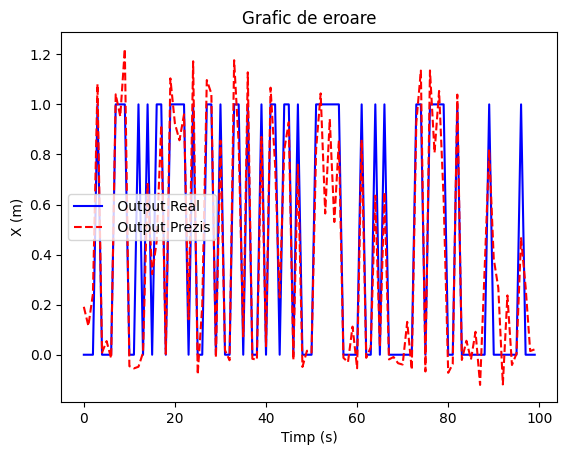

In [22]:
plt.figure(1)
#ax1 = plt.subplot(121)
plt.title("Grafic de eroare")
# plt.plot(y_outputs[:100,0], color = "blue", label = " Output Real")
plt.plot(ytest[:100,0], color = "blue", label = " Output Real")
plt.plot(correct_values[:100,0], color = "red", linestyle= "--", label = " Output Prezis")
plt.xlabel("Timp (s)")
plt.ylabel("X (m)")
plt.legend()
plt.show()

In [23]:
# print("Eoare patratica : ", mean_squared_error(y_outputs[:,0], correct_values[:,0]))
print("Eoare patratica : ", mean_squared_error(ytest[:,0], correct_values[:,0]))

Eoare patratica :  0.04512593517899225


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

test_predictions = model.predict(xtest)

test_predictions = scaler2.inverse_transform(test_predictions)

conf_matrix = confusion_matrix(ytest, test_predictions.round())
accuracy = accuracy_score(ytest, test_predictions.round())

print("Matrice de confuzie:\n", conf_matrix)
print("Acuratete: %.2f%%" % (accuracy * 100))


6/6 [==============================] - 0s 3ms/step
Matrice de confuzie:
 [[103   0]
 [  8  60]]
Acuratete: 95.32%


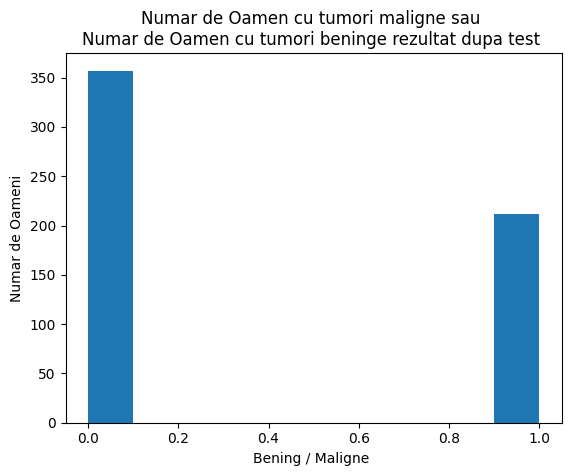

In [24]:
plt.hist(y_outputs) 
plt.title("Numar de Oamen cu tumori maligne sau \nNumar de Oamen cu tumori beninge rezultat dupa test ")
plt.xlabel("Bening / Maligne ")
plt.ylabel("Numar de Oameni")
plt.show()

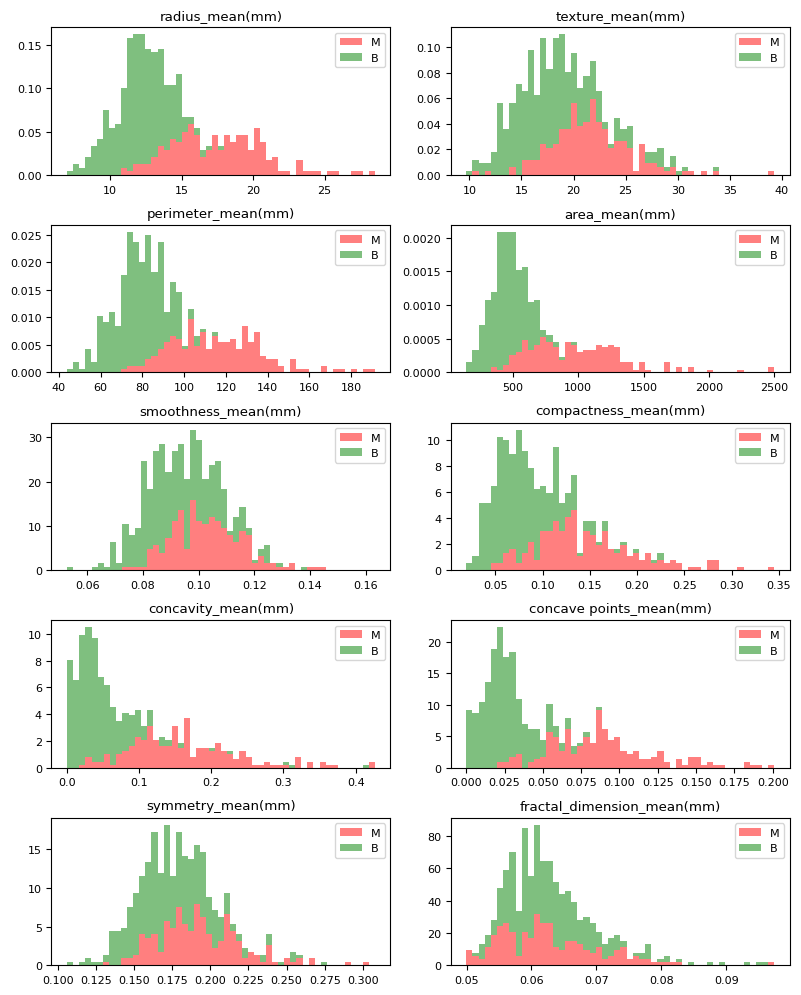

In [25]:
features_mean=list(x)
dfM=whole_data[whole_data['diagnosis'] == 1]
dfB=whole_data[whole_data['diagnosis'] == 0]
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()

for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(whole_data[features_mean[idx]]) - min(whole_data[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(whole_data[features_mean[idx]]),
            max(whole_data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5, stacked=True, density = True,
            label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx] + "(mm)")
plt.tight_layout()
plt.show()